In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import os
import librosa
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import json
import pandas as pd
import math


In [6]:
dangerdf = pd.read_csv('SAS_Evaluation_Danger.csv')
safetydf = pd.read_csv ('SAS_Evaluation_safety.csv')


In [7]:
print(safetydf['selected_mushra'][0])
songs = safetydf['examples_json'][0].split(",")
global test_list
test_list = [int(i) for i in songs]
songnum = len(test_list)



print(test_list)
print(dangerdf.iloc[3,1])

202,91,93,154,177,118,179,109,45,138,171,87,191,60,185,144,145,88,178,76,105,24,41,166,96,67,126,151,98,154,0,77,169,51,132,164,47,124,159,89,9,136,89,141,94,37,136,20,67,106,9,71,18,20,64,127,62,62,80,44,81,126,3,95,15,89,7,81,17,4,47,61
[740, 756, 1554, 1730, 3497, 3499, 4066, 4069, 4511, 4703, 4850, 5222, 5224, 5348, 6525, 6658, 6664, 6778, 7545, 7709, 9512, 9989, 10442, 10690, 10737, 11201, 11432, 11454, 11612, 11724, 11748, 11752, 12489, 13014, 13578, 13582, 13814, 13864, 14053, 14216, 14390, 14921, 15094, 15145, 16057, 16095, 16439, 16448, 16554, 16878, 16997, 17324, 17344, 17609, 17910, 18022, 18578, 18579, 19266, 19354, 19355, 20376, 20432, 20449, 21542, 21708, 21848, 21898, 22128, 23013, 23146, 23525, 23820, 24178, 24418, 24422, 24429, 24640, 24794, 24995, 25005, 25145, 25364, 25804, 26171, 26630, 26632, 26697, 27148, 27633, 27752, 27866, 28111, 28175, 28178, 28476, 29324, 29469, 29957, 30071, 30095, 30740, 31234, 31236, 31574, 31576, 32326, 32517, 33064, 33220, 33271, 34513, 

In [28]:

Danger = [ [] for _ in range(songnum) ]
Urgency = [ [] for _ in range(songnum) ]
Risk = [ [] for _ in range(songnum) ]
Collaboration = [ [] for _ in range(songnum) ]
Approachability = [ [] for _ in range(songnum) ]

categories = [Danger,Urgency,Risk,Collaboration,Approachability]

# Add safety
for index, row in safetydf.iterrows():
    np.array(row)
    songsused = [int(i) for i in row['selected_mushra'].split(",")]
    # print(row[1])
    cnum = 0
    for cat in categories:
        safetyv = np.array(row[cnum+1:351:5])
        # print(len(safetyv),len(songsused),songnum)

        for i in range(len(safetyv)):
            if math.isnan(safetyv[i]):
                cat[songsused[i+1]].append(0)
            else:
                cat[songsused[i+1]].append(safetyv[i])
        cnum += 1

#Add danger
for index, row in dangerdf.iterrows():
    np.array(row)
    songsused = [int(i) for i in row['selected_mushra'].split(",")]
    # print(row[1])
    cnum = 0
    for cat in categories:
        safetyv = np.array(row[cnum+1:351:5])
        if cnum ==0:
            # print(safetyv)
            safetyv = -1*safetyv
            # print(safetyv)
        # print(len(safetyv),len(songsused),songnum)

        for i in range(len(safetyv)):
            if math.isnan(safetyv[i]):
                cat[songsused[i+1]].append(0)
            else:
                cat[songsused[i+1]].append(safetyv[i])
        cnum += 1
# print(Collaboration[0])
global songdata
songdata = {}
count = 0
for name in test_list:
    songdata[str(name)] = {'Danger': Danger[count],'Urgency':Urgency[count],'Risk':Risk[count],'Collaboration':Collaboration[count],'Approachability':Approachability[count],'Name':name}
    count += 1

# print(songdata['740'])

In [9]:
def Evaluate(category):
    counter = 0
    stats = []
    # dict = {}
    for song in category:
        
        npsong = np.array(song)
        std = np.std(npsong)
        mean = np.mean(npsong)
        mode = max(set(song), key=song.count)
        songname = test_list[counter]
        # dict[str()]
        counter += 1
        if mode == 0:
            continue
        stats.append([std,mean, songname])
    # print(stats)
    return stats


In [10]:
catstat = []
for cat in categories:
    catstat.append(Evaluate(cat))
# print(catstat)
sortstat =[]
best = 20
for cat in catstat:
    sortedcat = sorted(cat, key=lambda x: x[0])
    for item in sortedcat[:]:
        # variable = [ i for i, j in locals().items() if j == cat][0]
        # print(variable)
        # input()
        if len(songdata[str(item[2])]['Danger']) < 30:
            # print("sdads")
            sortedcat.remove(item)
    # print()
    # input()
    sortstat.append(sortedcat[0:best])
# print(sortstat)



In [11]:
def makeHist(catUse,sortstatcat):
    for songstat in sortstatcat:
        # songdata[str(songstat[2])]
        plt.hist(songdata[str(songstat[2])][catUse], bins=7, color='skyblue', edgecolor='black')
    
        # Adding labels and title
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title(str(songstat[2])+ ' '+ catUse)
        
        # Display the plot
        plt.show()
    # catnames = ['Danger','Urgency','Risk','Collaboration','Approachability']
    # for i in range(len(catnames)):
    #     sortstat[i] 



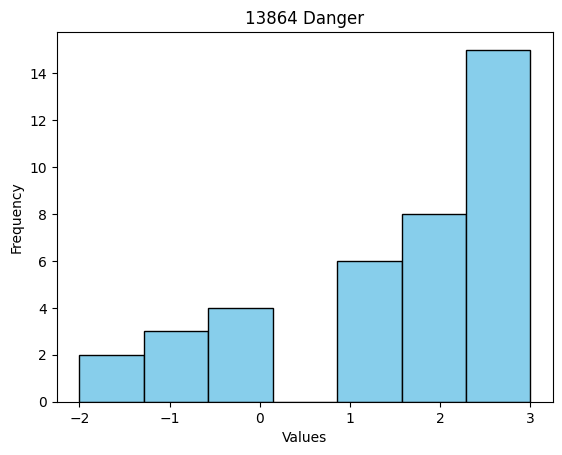

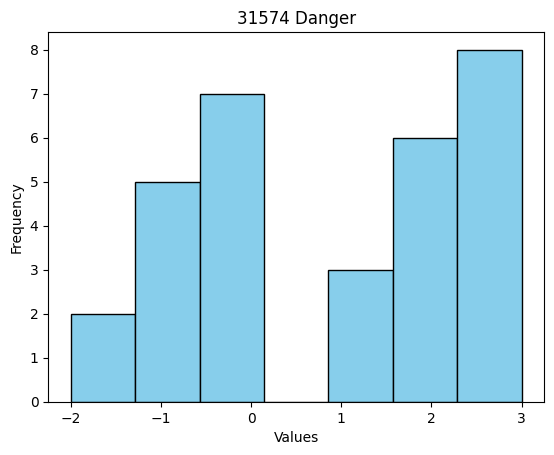

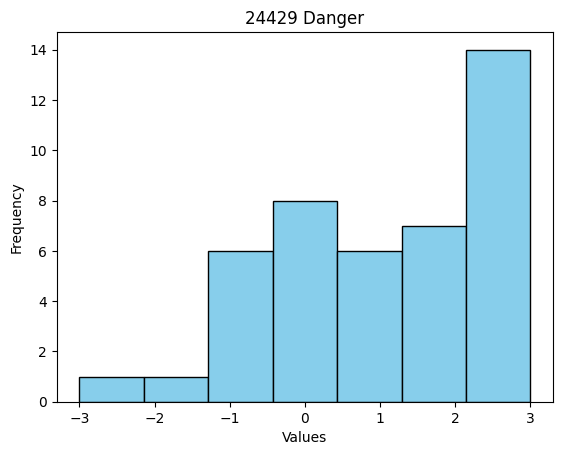

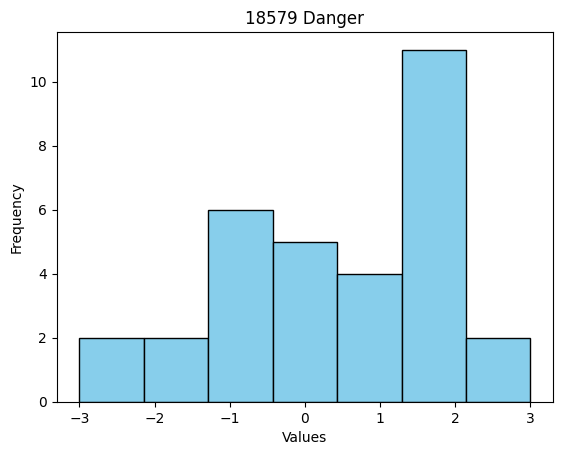

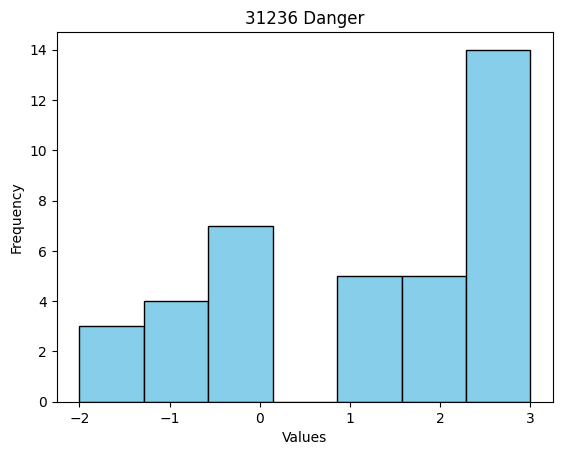

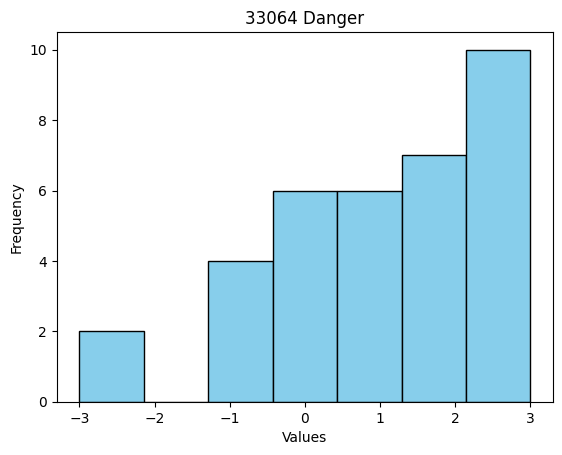

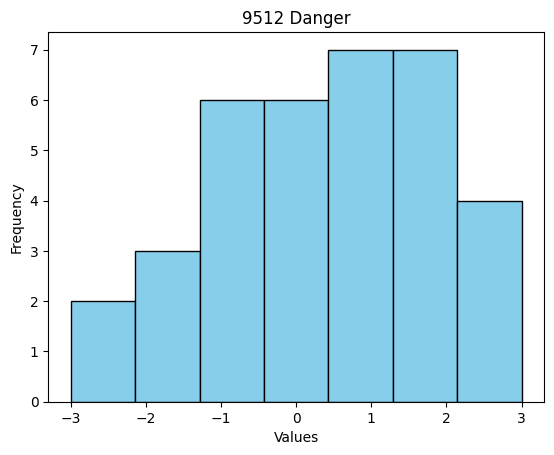

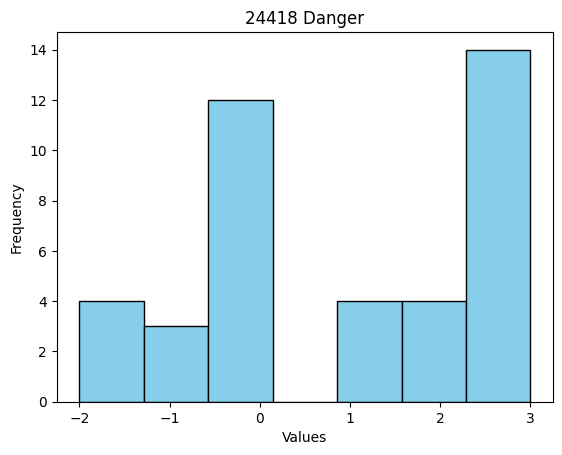

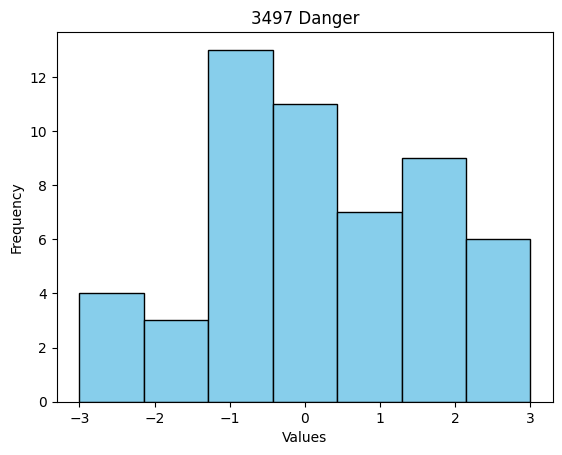

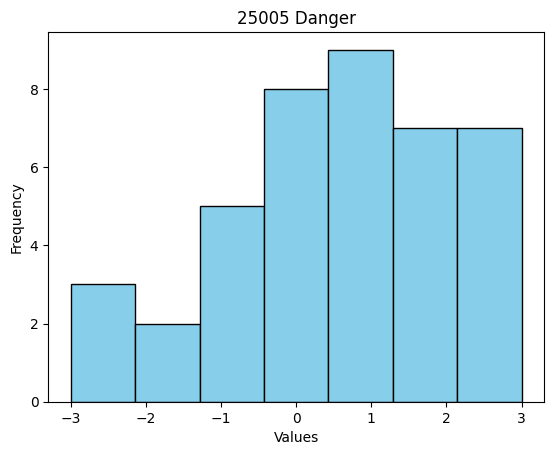

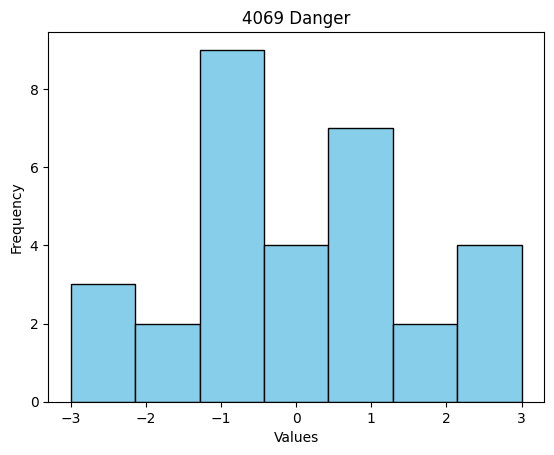

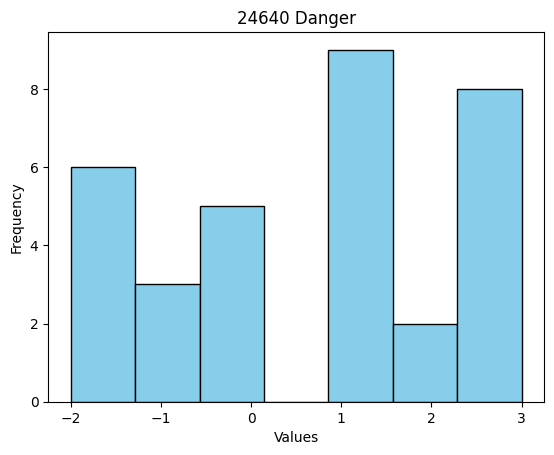

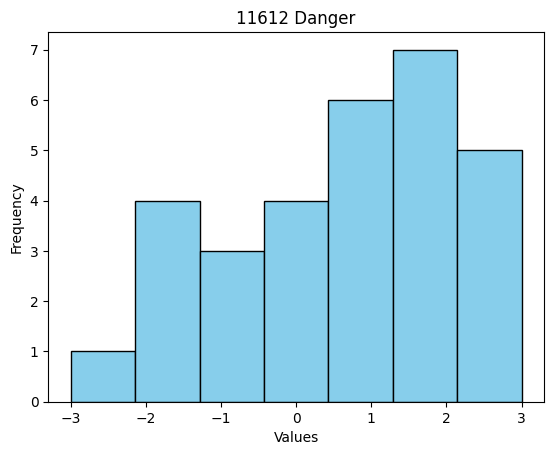

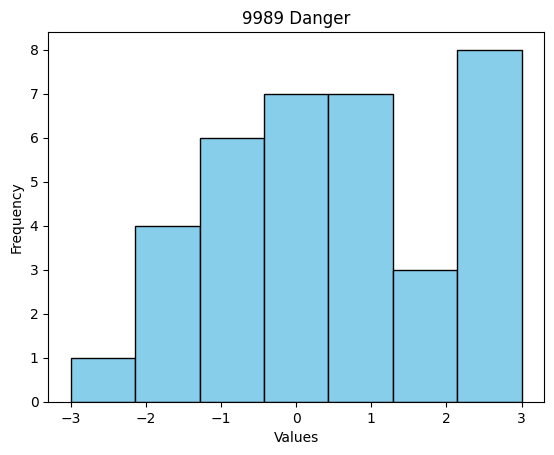

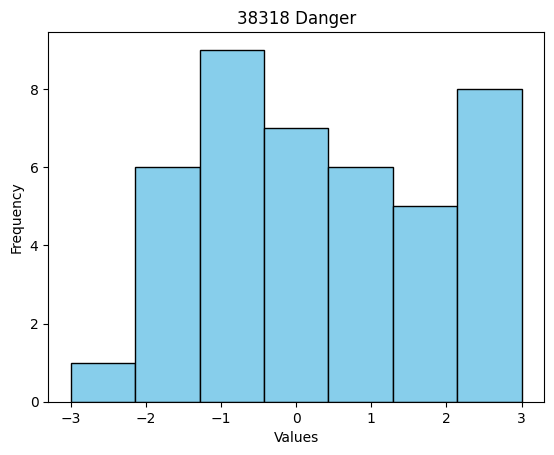

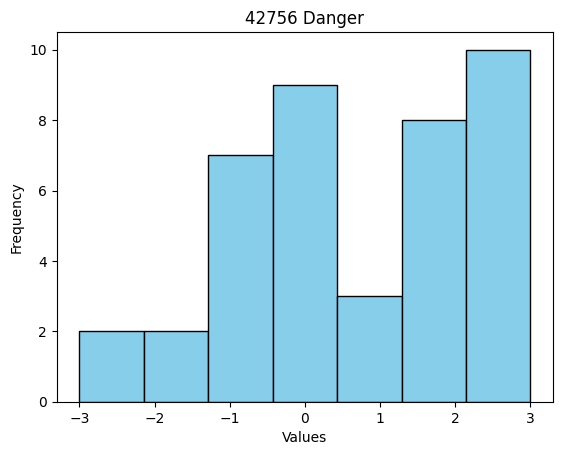

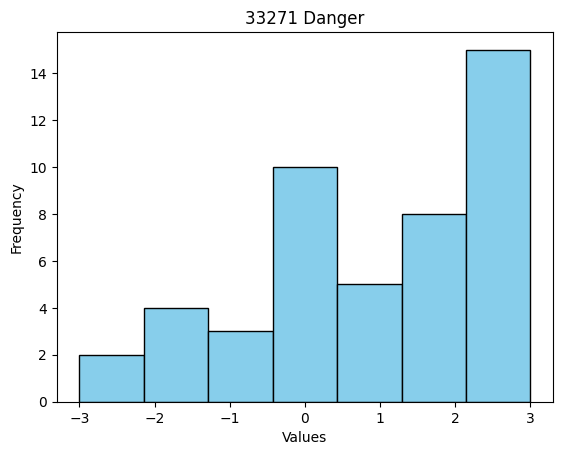

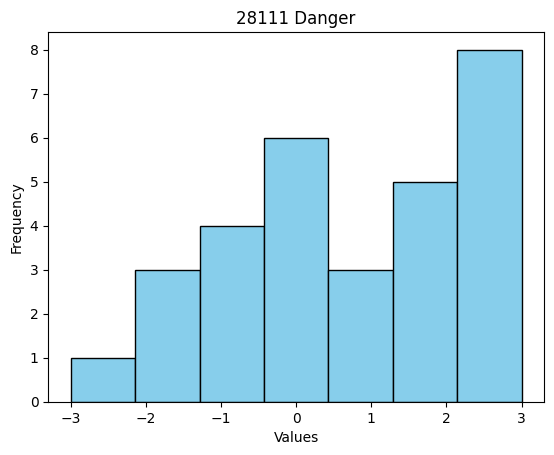

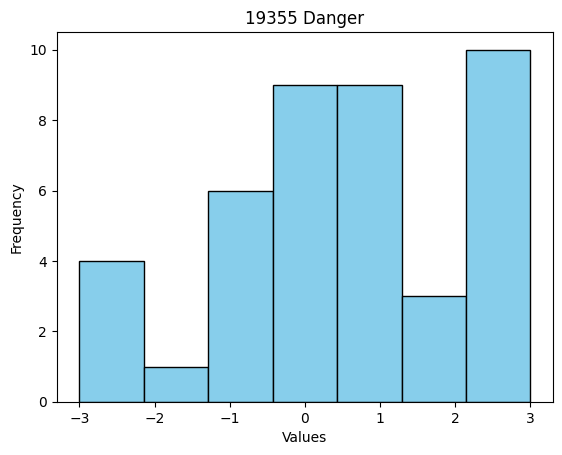

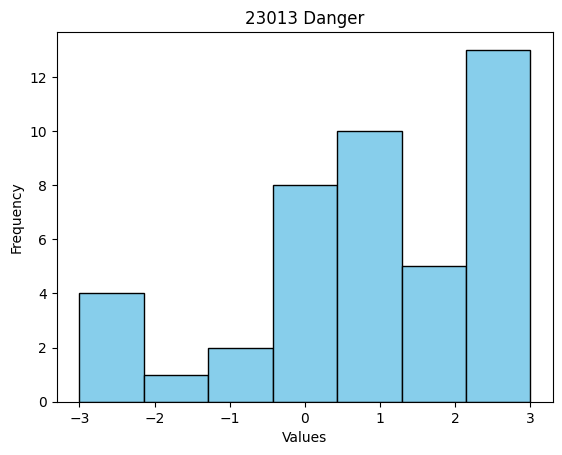

In [12]:
makeHist('Danger',sortstat[0])

In [14]:
def read_file(path):
    audio, fs = sf.read(path)
    # if fs is not 44.1, resample
    if fs != 44100:
        audio = librosa.resample(audio, orig_sr=fs, target_sr=44100)
        fs = 44100
    # return mono
    if len(audio.shape) > 1:
        audio = librosa.to_mono(audio.T)
    return audio, fs


def compute_feature_vector(features):
    # compute the mean of the features, stddev and average diff between features
    mean = np.mean(features, axis=1)
    std = np.std(features, axis=1)
    # diff = np.diff(features, axis=1)
    # avg_diff = np.mean(diff, axis=1)
    feats = np.hstack((mean, std))
    return feats

In [23]:
ROOT_PATH = "/Users/gil/Downloads/SASSample"
# read all subdirectories in the folder as keys and the files in the subdirectories as values
fma_data = {}
for root, dirs, files in os.walk(ROOT_PATH):
        for file in files:
            if file.endswith(".mp3"):
                if root not in fma_data:
                    # get the subdirectory name

                    fma_data[root] = []
                # rawname = file[:-4]
                fma_data[root].append(file)



    # update keys to be the subdirectory name
fma_data = {root.split("/")[-1]: value for root, value in fma_data.items()}
audio_data = []
resultsname = []
# ROOT_PATH = "/Users/gil/Desktop"
for key, value in fma_data.items():
    for file in value:
        # print(os.path.join(ROOT_PATH, file))
        audio, fs = read_file(os.path.join(ROOT_PATH, file))
        rawname = file[:-4]
        audio_data.append(audio)
        resultsname.append(rawname)
# print(results[0])

In [259]:
# zero pad everything to largest length
max_len = max([len(audio) for audio in audio_data])
audio_data = [np.pad(audio, (0, max_len - len(audio))) for audio in audio_data]
audio_data = np.array(audio_data)
# generate labels using keys
# labels = np.array([int(key) for key in fma_data.keys()])
# repeat correctly to match the length of audio_data
labels = np.array([len(value) for value in fma_data.values()])
# compute mfccs for each audio file
mfccs = np.array(
    [librosa.feature.mfcc(y=audio, sr=44100, n_mfcc=13) for audio in audio_data]
)
# take average
centroids = np.array(
    [librosa.feature.spectral_centroid(y=audio, sr=44100) for audio in audio_data]
)
mfcc_feats = compute_feature_vector(mfccs)
centroid_feats = compute_feature_vector(centroids)

ValueError: max() arg is an empty sequence

In [299]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler
from scipy import stats as st

# print(mfcc_feats)
print(resultsname)
print(songdata[str(int(resultsname[5]))])
X = []
y = []
featuretouse = 'Danger'
# print(st.mode(songdata[str(int(resultsname[i]))][featuretouse]))

for i in range(len(mfcc_feats)):
    if st.mode(songdata[str(int(resultsname[i]))][featuretouse])[0][0] != 0.0:
        # print(st.mode(songdata[str(int(resultsname[i]))][featuretouse]))
        X.append(mfcc_feats[i].reshape((1,-1)))
        y.append(np.mean(songdata[str(int(resultsname[i]))][featuretouse]))

# print(y)
y = np.array(y)

X = np.array(X).reshape(len(y), -1)
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



['029469', '024429', '054131', '015145', '039530', '005222', '013864', '030071', '058130', '054124', '004511', '064542', '029324', '009989', '049361', '042234', '048731', '036990', '040782', '039282', '048453', '038361', '033220', '011724', '047832', '059173', '023146', '031234', '032517', '045012', '054137', '004066', '005224', '001730', '024995', '017344', '019355', '019354', '017609', '047016', '056872', '027866', '006664', '006658', '021542', '040369', '014921', '016878', '047835', '011454', '042756', '004703', '004850', '040784', '003497', '026171', '055821', '028175', '038819', '022128', '035454', '007545', '016448', '031236', '020449', '011432', '056802', '028476', '034513', '046147', '007709', '012489', '058757', '027752', '025145', '025804', '028111', '039949', '021848', '001554', '016997', '011752', '046144', '016439', '013582', '027633', '020376', '035569', '017910', '014216', '023525', '059504', '064450', '013814', '055100', '064445', '013578', '060757', '042286', '044344',

/var/folders/cc/0yms00w579x7h9fbfv9kzyyw0000gn/T/ipykernel_47164/446373785.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  if st.mode(songdata[str(int(resultsname[i]))][featuretouse])[0][0] != 0.0:


In [300]:
svr_rbf = SVR(kernel='linear')#
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
svr = SVR(kernel='rbf') 
  
# train the model on the data 
scores = svr_rbf.fit(X_train, y_train)

preds = scores.predict(X_test)
print(-r2_score(preds, y_test))
print(mean_squared_error(preds, y_test))
print(mean_absolute_error(preds, y_test))

# scores = cross_validate(estimator, X, y, cv=KFold(10, shuffle=True), scoring=scoring, return_train_score=False)





# score = -1 * scores['test_neg_mean_absolute_error']
# print("MAE: %.4f (%.4f)" % (score.mean(), score.std()))

# score = -1 * scores['test_neg_mean_squared_error']
# print("MSE: %.4f (%.4f)" % (score.mean(), score.std()))

# score = scores['test_r2']
# print("R^2: %.4f (%.4f)" % (score.mean(), score.std()))

0.8050163587927708
0.5159664005425754
0.5935470218471705


In [277]:
from pprint import pprint
pprint(list(zip(preds, y_test)))

[(0.16417317382245658, 0.2222222222222222),
 (0.26303287974383016, 0.16216216216216217),
 (0.13540222175126032, 0.3238095238095238),
 (0.2828878809052994, 0.01075268817204301),
 (0.2841562440758186, 0.17094017094017092),
 (0.2462166601895226, 0.25),
 (0.194971049571653, -0.11666666666666665),
 (0.22702258860018393, 0.18939393939393942),
 (0.23254185239148098, 0.25757575757575757),
 (0.2630103336395081, 0.0392156862745098),
 (0.28555993922516854, 0.6041666666666666),
 (0.05057332083071417, 0.2878787878787879),
 (0.23297303456400745, 0.6666666666666666),
 (0.09552528854862616, 0.05982905982905983),
 (0.45864664632937474, 0.3137254901960784),
 (0.24214399070231538, 0.1111111111111111),
 (0.24940233764158248, 0.12698412698412698),
 (0.5222803114370744, 0.19607843137254902),
 (0.33493018500884525, 0.3255813953488372),
 (0.4628641862074015, 0.16666666666666666),
 (0.4052002729852371, 0.05555555555555555),
 (0.5130089251534772, 0.3225806451612903),
 (0.12486964454795718, 0.007936507936507936)

-1.952190803717718

0.0451072025430825

0.17528266171150544